In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
movies_metadata = pd.read_csv('/content/movies_metadata.csv', low_memory=False)
print(movies_metadata)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

In [24]:
print(movies_metadata.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [25]:
print(movies_metadata.shape)

(45466, 24)


In [26]:
print(movies_metadata.describe())

            revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000


In [27]:
print(movies_metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [28]:
print(movies_metadata['title'].value_counts())

Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
Cluny Brown              1
Babies                   1
The Green Room           1
Captain Conan            1
Queerama                 1
Name: title, Length: 42277, dtype: int64


In [29]:
print(movies_metadata.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


Axes(0.125,0.11;0.775x0.77)


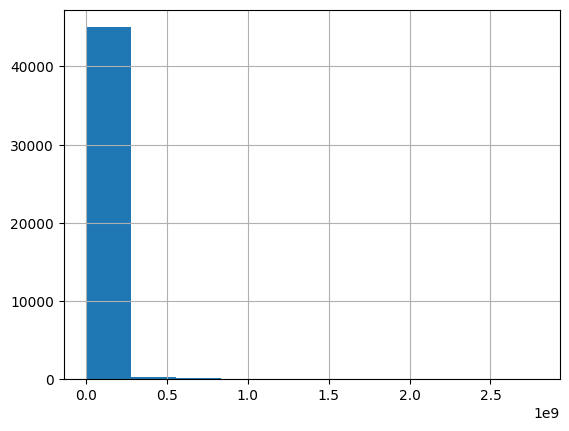

In [30]:
print( movies_metadata['revenue'].hist())

Axes(0.125,0.11;0.775x0.77)


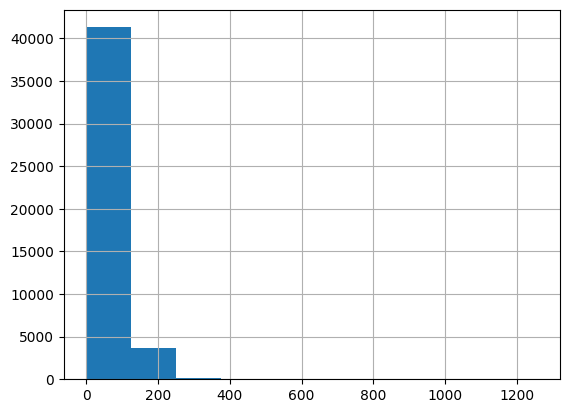

In [31]:
print( movies_metadata['runtime'].hist())

Axes(0.125,0.11;0.775x0.77)


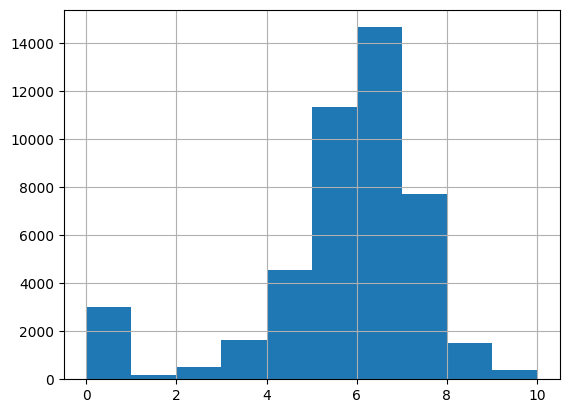

In [32]:
print( movies_metadata['vote_average'].hist())

Axes(0.125,0.11;0.775x0.77)


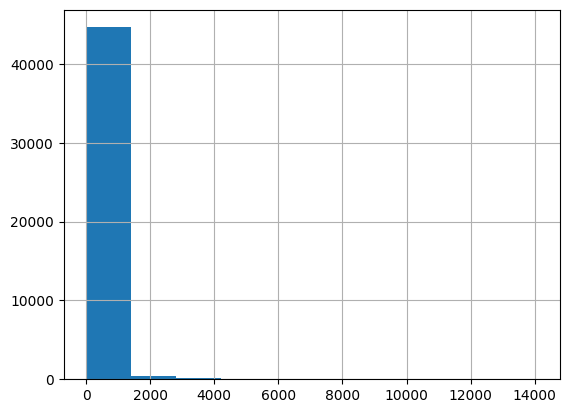

In [33]:
print( movies_metadata['vote_count'].hist())

In [34]:
features = ['title', 'vote_average', 'vote_count', 'popularity', 'runtime', 'genres']
movies = movies_metadata[features]

In [35]:
movies = movies.dropna(subset=['vote_average', 'vote_count'])
min_vote_count = 100
movies = movies[movies['vote_count'] >= min_vote_count]

Text(0, 0.5, 'Frequency')

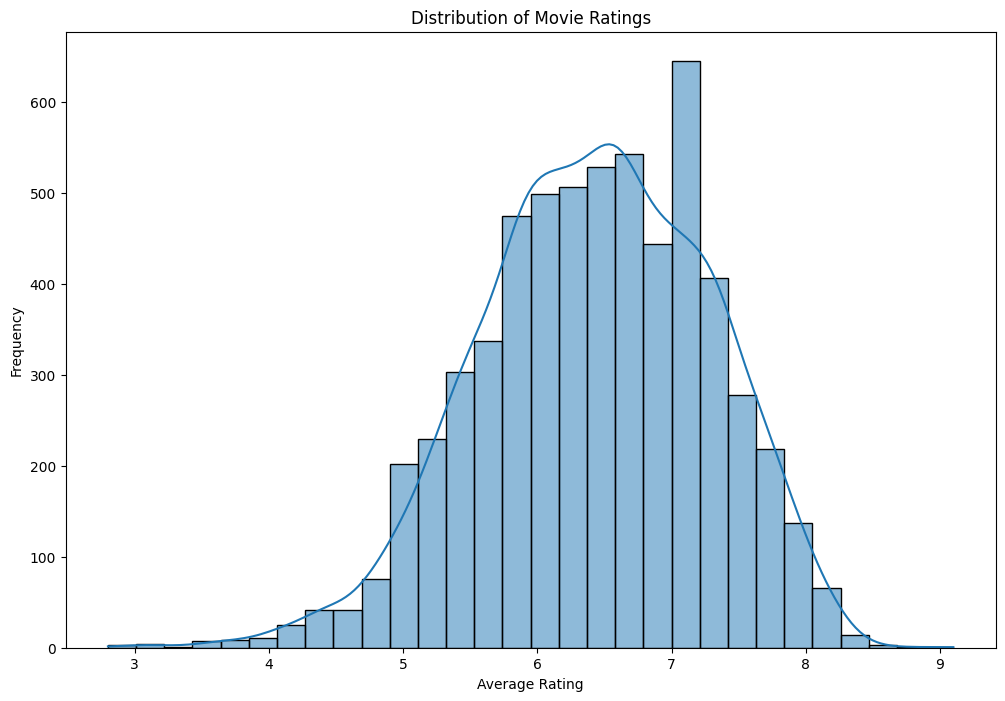

In [36]:
plt.figure(figsize=(12, 8))
sns.histplot(movies['vote_average'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

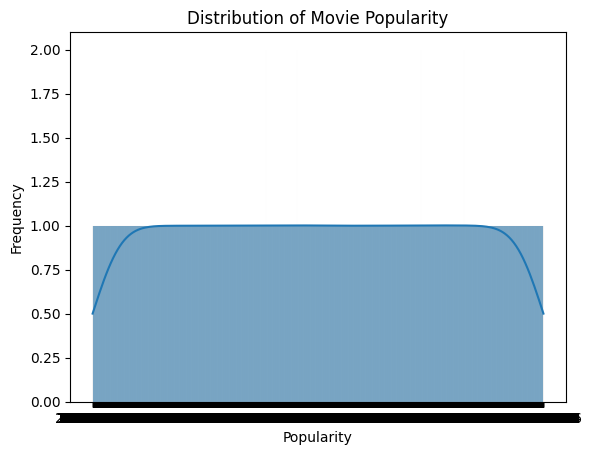

In [37]:
sns.histplot(movies['popularity'], bins=30, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

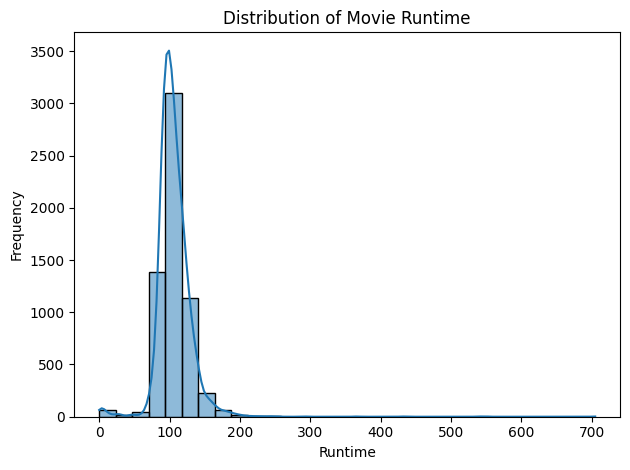

In [38]:
sns.histplot(movies['runtime'], bins=30, kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [39]:
movies['genres'] = movies['genres'].fillna('')
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['genres'])
content_similarity = cosine_similarity(tfidf_matrix)
content_similarity_df = pd.DataFrame(content_similarity, index=movies['title'], columns=movies['title'])

In [40]:
user_item_matrix = movies.pivot_table(index='title', columns=None, values='vote_average', aggfunc='mean')
user_item_matrix = user_item_matrix.fillna(0)
item_similarity = cosine_similarity(user_item_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [41]:
def get_content_based_recommendations(movie_title, content_similarity_df):
    if movie_title in content_similarity_df.index:
        similar_scores = content_similarity_df[movie_title]
        similar_movies = similar_scores.sort_values(ascending=False).index.tolist()
        similar_movies = [movie for movie in similar_movies if movie != movie_title]
        return similar_movies
    else:
        return []

In [42]:
def get_hybrid_recommendations(movie_title, user_item_matrix, item_similarity_df, content_similarity_df, alpha=0.5):
    collaborative_recommendations = get_movie_recommendations(movie_title, user_item_matrix, item_similarity_df)
    content_recommendations = get_content_based_recommendations(movie_title, content_similarity_df)
    common_movies = set(collaborative_recommendations) & set(content_recommendations)
    collaborative_recommendations = np.array(collaborative_recommendations)
    content_recommendations = np.array(content_recommendations)
    collaborative_recommendations = np.setdiff1d(collaborative_recommendations, list(common_movies))
    hybrid_recommendations = np.concatenate((collaborative_recommendations, content_recommendations))
    hybrid_recommendations = list(np.unique(hybrid_recommendations))
    return hybrid_recommendations

In [43]:
def get_movie_recommendations(movie_title, user_item_matrix, item_similarity_df):
    if movie_title in user_item_matrix.index:
        similar_scores = item_similarity_df[movie_title]
        similar_movies = similar_scores.sort_values(ascending=False).index.tolist()
        similar_movies = [movie for movie in similar_movies if movie != movie_title]
        return similar_movies
    else:
        return []

In [44]:
input_movie = 'Inception'
collaborative_recommendations = get_movie_recommendations(input_movie, user_item_matrix, item_similarity_df)
content_recommendations = get_content_based_recommendations(input_movie, content_similarity_df)
hybrid_recommendations = get_hybrid_recommendations(input_movie, user_item_matrix, item_similarity_df, content_similarity_df)
if collaborative_recommendations:
    print(f"Collaborative Filtering Recommendations for '{input_movie}':")
    print(collaborative_recommendations[:5])
else:
    print(f"Movie '{input_movie}' not found in the dataset.")
if content_recommendations:
    print(f"Content-Based Recommendations for '{input_movie}':")
    print(content_recommendations[:5])
else:
    print(f"Movie '{input_movie}' not found in the dataset.")
if hybrid_recommendations:
    print(f"Hybrid Recommendations for '{input_movie}':")
    print(hybrid_recommendations[:5])
else:
    print(f"Movie '{input_movie}' not found in the dataset.")

Collaborative Filtering Recommendations for 'Inception':
["'71", 'Spectre', 'Spider-Man 2', 'Spider-Man', 'Spider']
Content-Based Recommendations for 'Inception':
['Paycheck', 'Sky Captain and the World of Tomorrow', 'Knowing', 'Congo', 'Oblivion']
Hybrid Recommendations for 'Inception':
["'71", '(500) Days of Summer', '...And Justice for All', '10 Cloverfield Lane', '10 Things I Hate About You']


In [45]:
features = ['vote_count', 'popularity', 'runtime']
train_data, test_data = train_test_split(movies[features + ['vote_average']], test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(train_data[features], train_data['vote_average'])
predictions = lr_model.predict(test_data[features])
mse = mean_squared_error(test_data['vote_average'], predictions)
print(f"Mean Squared Error of the Linear Regression Model: {mse:.2f}")

Mean Squared Error of the Linear Regression Model: 0.65


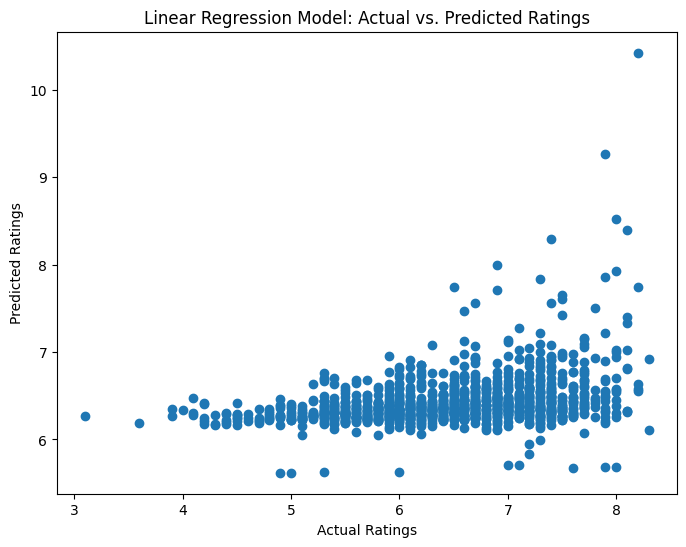

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(test_data['vote_average'], predictions)
plt.title('Linear Regression Model: Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [47]:
# Dynamic Input: Predict Rating for a New Movie
def predict_rating_for_new_movie(movie_title, lr_model):
    input_features = []
    print(f"\nEnter details for the movie '{movie_title}':")
    vote_count = float(input("Enter Vote Count: "))
    popularity = float(input("Enter Popularity: "))
    runtime = float(input("Enter Runtime (in minutes): "))
    input_features.extend([vote_count, popularity, runtime])
    predicted_rating = lr_model.predict([input_features])[0]
    print(f"\nPredicted Rating for '{movie_title}': {predicted_rating:.2f}")
new_movie_title = 'New Movie'
predict_rating_for_new_movie(new_movie_title, lr_model)


Enter details for the movie 'New Movie':
Enter Vote Count: 5415
Enter Popularity: 21.946943
Enter Runtime (in minutes): 81.0

Predicted Rating for 'New Movie': 6.95


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
def predict_rating_for_new_movie(lr_model):
    input_features = []
    print("\nEnter details for the new movie:")
    vote_count = float(input("Enter Vote Count: "))
    popularity = float(input("Enter Popularity: "))
    runtime = float(input("Enter Runtime (in minutes): "))
    input_features.extend([vote_count, popularity, runtime])
    predicted_rating = lr_model.predict([input_features])[0]
    print(f"\nPredicted Rating for the new movie: {predicted_rating:.2f}")
input_movie = input("Enter the movie title: ")
collaborative_recommendations = get_movie_recommendations(input_movie, user_item_matrix, item_similarity_df)
content_recommendations = get_content_based_recommendations(input_movie, content_similarity_df)
hybrid_recommendations = get_hybrid_recommendations(input_movie, user_item_matrix, item_similarity_df, content_similarity_df)
if collaborative_recommendations:
    print(f"\nCollaborative Filtering Recommendations for '{input_movie}':")
    for movie in collaborative_recommendations[:5]:
        print(movie)
else:
    print(f"Movie '{input_movie}' not found in the dataset.")
if content_recommendations:
    print(f"\nContent-Based Recommendations for '{input_movie}':")
    for movie in content_recommendations[:5]:
        print(movie)
if hybrid_recommendations:
    print(f"\nHybrid Recommendations for '{input_movie}':")
    for movie in hybrid_recommendations[:5]:
        print(movie)
else:
    print("No recommendations available.")
predict_rating_for_new_movie(lr_model)

Enter the movie title: Batman Forever

Collaborative Filtering Recommendations for 'Batman Forever':
'71
Spectre
Spider-Man 2
Spider-Man
Spider

Content-Based Recommendations for 'Batman Forever':
Batman & Robin
Kung Fu Hustle
R.I.P.D.
Drive Angry
Hancock

Hybrid Recommendations for 'Batman Forever':
'71
(500) Days of Summer
...And Justice for All
10 Cloverfield Lane
10 Things I Hate About You

Enter details for the new movie:
Enter Vote Count: 1529
Enter Popularity: 21.326
Enter Runtime (in minutes): 81.0

Predicted Rating for the new movie: 6.36


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
